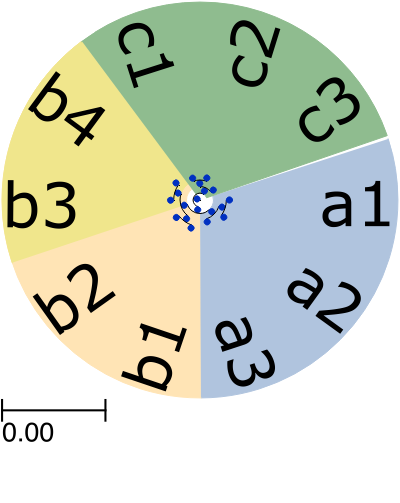


            /-a1
         /-|
      /-|   \-a2
     |  |
     |   \-a3
   /-|
  |  |      /-b1
  |  |   /-|
  |  |  |   \-b2
  |   \-|
--|     |   /-b3
  |      \-|
  |         \-b4
  |
  |      /-c1
  |   /-|
   \-|   \-c2
     |
      \-c3


In [20]:
from ete3 import Tree, faces, AttrFace, TreeStyle, NodeStyle
from IPython.display import Image, display

def layout(node):
    if node.is_leaf():
        N = AttrFace("name", fsize=30)
        faces.add_face_to_node(N, node, 0, position="aligned")

def get_example_tree():

    # Set dashed blue lines in all leaves
    nst1 = NodeStyle()
    nst1["bgcolor"] = "LightSteelBlue"
    nst2 = NodeStyle()
    nst2["bgcolor"] = "Moccasin"
    nst3 = NodeStyle()
    nst3["bgcolor"] = "DarkSeaGreen"
    nst4 = NodeStyle()
    nst4["bgcolor"] = "Khaki"


    t = Tree("((((a1,a2),a3), ((b1,b2),(b3,b4))), ((c1,c2),c3));")
    for n in t.traverse():
        n.dist = 0

    n1 = t.get_common_ancestor("a1", "a2", "a3")
    n1.set_style(nst1)
    n2 = t.get_common_ancestor("b1", "b2", "b3", "b4")
    n2.set_style(nst2)
    n3 = t.get_common_ancestor("c1", "c2", "c3")
    n3.set_style(nst3)
    n4 = t.get_common_ancestor("b3", "b4")
    n4.set_style(nst4)
    ts = TreeStyle()
    ts.layout_fn = layout
    ts.show_leaf_name = False

    ts.mode = "c"
    ts.root_opening_factor = 1
    return t, ts

if __name__ == "__main__":
    t, ts = get_example_tree()
    t.render("node_background.png", w=400, tree_style=ts)
    display(Image(filename='node_background.png'))
    t.show(tree_style=ts)
    print (t)

In [23]:
from ete3 import Tree
t =  Tree("((((((4, e), i), o),h), u), ((3, 4), (i, june)));")
# we annotate the tree using external data
colors = {"a":"red", "e":"green", "i":"yellow",
          "o":"black", "u":"purple", "4":"green",
          "3":"yellow", "1":"white", "5":"red",
          "june":"yellow"}
for leaf in t:
    leaf.add_features(color=colors.get(leaf.name, "none"))
    leaf.add_features(num= "num: "+str(len(colors.get(leaf.name, "none"))))
print t.get_ascii(attributes=["name", "color","num"], show_internal=False)
t.show()


                  /-4, green, num: 5
               /-|
            /-|   \-e, green, num: 5
           |  |
         /-|   \-i, yellow, num: 6
        |  |
      /-|   \-o, black, num: 5
     |  |
   /-|   \-h, none, num: 4
  |  |
  |   \-u, purple, num: 6
--|
  |      /-3, yellow, num: 6
  |   /-|
  |  |   \-4, green, num: 5
   \-|
     |   /-i, yellow, num: 6
      \-|
         \-june, yellow, num: 6


In [15]:
from ete3 import Tree
t = Tree()
t.populate(50)

node2leaves = t.get_cached_content()
print t.get_ascii(attributes=["name", "color","num"], show_internal=False)
# lets now print the size of each node without the need of
# recursively traverse
for n in t.traverse():
    print "node %s contains %s tips" %(n.name, len(node2leaves[n]))


            /-aaaaaaaaaj
         /-|
        |  |   /-aaaaaaaaak
        |   \-|
      /-|      \-aaaaaaaaal
     |  |
     |  |   /-aaaaaaaaam
     |   \-|
     |      \-aaaaaaaaan
     |
     |      /-aaaaaaaaao
   /-|   /-|
  |  |  |  |   /-aaaaaaaaap
  |  |  |   \-|
  |  |  |     |   /-aaaaaaaaaq
  |  |  |      \-|
  |  |  |        |   /-aaaaaaaaar
  |  |  |         \-|
  |   \-|           |   /-aaaaaaaaas
  |     |            \-|
  |     |              |   /-aaaaaaaaat
  |     |               \-|
  |     |                  \-aaaaaaaaau
  |     |
  |     |   /-aaaaaaaaav
  |      \-|
  |         \-aaaaaaaaaw
  |
  |         /-aaaaaaaaax
  |      /-|
  |     |   \-aaaaaaaaay
  |     |
  |     |      /-aaaaaaaaaz
  |     |   /-|
  |   /-|  |  |   /-aaaaaaaabb
  |  |  |  |   \-|
--|  |  |  |     |   /-aaaaaaaabc
  |  |  |  |      \-|
  |  |  |  |         \-aaaaaaaabd
  |  |  |  |
  |  |   \-|      /-aaaaaaaabe
  |  |     |   /-|
  |  |     |  |  |   /-aaaaaaaabf
  |  |     |  |   \-

# Automatic tree annotation using NCBI taxonomy
NCBI taxonomy annotation consists of adding additional information to any internal a leaf node in a give user tree. Only an attribute containing the taxid associated to each node is required for the nodes in the query tree. The annotation process will add the following features to the nodes:

- sci_name
- taxid
- named_lineage
- lineage
- rank

In [21]:
from ete3 import PhyloTree

# load the whole leaf name as species taxid
tree = PhyloTree('((9606, 9598), 10090);', sp_naming_function=lambda name: name)
tax2names, tax2lineages, tax2rank = tree.annotate_ncbi_taxa()

# split names by '|' and return the first part as the species taxid
tree = PhyloTree('((9606|protA, 9598|protA), 10090|protB);', sp_naming_function=lambda name: name.split('|')[0])
tax2names, tax2lineages, tax2rank = tree.annotate_ncbi_taxa()

print tree.get_ascii(attributes=["name", "sci_name", "taxid"])


#                                             /-9606|protA, Homo sapiens, 9606
#                          /, Homininae, 207598
#-, Euarchontoglires, 314146                  \-9598|protA, Pan troglodytes, 9598
#                         |
#                          \-10090|protB, Mus musculus, 10090


                                             /-9606|protA, Homo sapiens, 9606
                          /, Homininae, 207598
-, Euarchontoglires, 314146                  \-9598|protA, Pan troglodytes, 9598
                         |
                          \-10090|protB, Mus musculus, 10090


## Alternatively, you can also use the NCBITaxa.annotate_tree() function to annotate a custom tree instance.



In [2]:
from ete3 import Tree, NCBITaxa
ncbi = NCBITaxa()
tree = Tree()
#tree.populate(50)

ncbi.annotate_tree(tree, taxid_attr="name")

({}, {}, {})

## Loading PhyloXML projects from files



In [18]:
from ete3 import Phyloxml
project = Phyloxml()
project.build_from_file("apaf.xml")

# Each tree contains the same methods as a PhyloTree object
for tree in project.get_phylogeny():
    print tree
    # you can even use rendering options
    #tree.show()
    # PhyloXML features are stored in the phyloxml_clade attribute
    for node in tree:
        #node.add_features(size=len(node))
 
        print "Node name:", node.name
        for seq in node.phyloxml_clade.get_sequence():
            for domain in seq.domain_architecture.get_domain():
                domain_data = [domain.valueOf_, domain.get_from(), domain.get_to()]
                print "  Domain:", '\t'.join(map(str, domain_data))

                
tree.show()


                              /-22_MOUSE
                           /-|
                        /-|   \-Apaf-1_HUMAN
                       |  |
                     /-|   \-12_CANFA
                    |  |
                  /-|   \-11_CHICK
                 |  |
                 |   \-16_XENLA
               /-|
              |  |      /-14_FUGRU
              |  |   /-|
              |   \-|   \-15_TETNG
            /-|     |
           |  |      \-17_BRARE
           |  |
           |  |      /-1_BRAFL
           |  |   /-|
         /-|   \-|   \-18_NEMVE
        |  |     |
        |  |      \-23_STRPU
        |  |
      /-|  |   /-26_STRPU
     |  |   \-|
     |  |      \-25_STRPU
     |  |
     |  |   /-CED4_CAEEL
     |   \-|
   /-|      \-31_CAEBR
  |  |
  |  |         /-28_DROPS
  |  |      /-|
  |  |   /-|   \-Dark_DROME
  |  |  |  |
  |   \-|   \-29_AEDAE
  |     |
  |      \-30_TRICA
  |
  |                  /-34_BRAFL
  |               /-|
--|            /-|   \-35_BRAFL


## Getting NCBI species tree topology
### annotate the tree

In [10]:
from ete3 import NCBITaxa
ncbi = NCBITaxa()
tax_list=[ 9927,9598, 10090,9606, 7707, 8782]
tree = ncbi.get_topology(tax_list,intermediate_nodes=False)
ncbi.annotate_tree(tree, taxid_attr='name')
print tree.get_ascii(attributes=["sci_name", "rank","name"])

# show the tree in ETE browser
#tree.show()


                             /-Dendrochirotida, order, 7707
                            |
                            |                                                                                                                      /-Homo sapiens, species, 9606
                            |                                                                                          /Homininae, subfamily, 207598
-Deuterostomia, no rank, 33511                                                     /Euarchontoglires, superorder, 314146                           \-Pan troglodytes, species, 9598
                            |                                                     |                                   |
                            |                       /Boreoeutheria, no rank, 1437010                                   \-Mus musculus, species, 10090
                            |                      |                              |
                             \Amniota, no rank, 3

In [17]:
from ete3 import nexml, Nexml
nexml_tree = nexml.NexmlTree("((hello, nexml):1.51, project):0.6;")
tree_collection =  nexml.get_trees()[0]

tree_collection.add_tree(nexml_tree)
nexml_tree.show()

AttributeError: 'module' object has no attribute 'get_trees'




aaaaaaaaad
aaaaaaaaae


aaaaaaaaaf



aaaaaaaaag
aaaaaaaaah
aaaaaaaaai
aaaaaaaaaj
aaaaaaaaaa

aaaaaaaaab
aaaaaaaaac


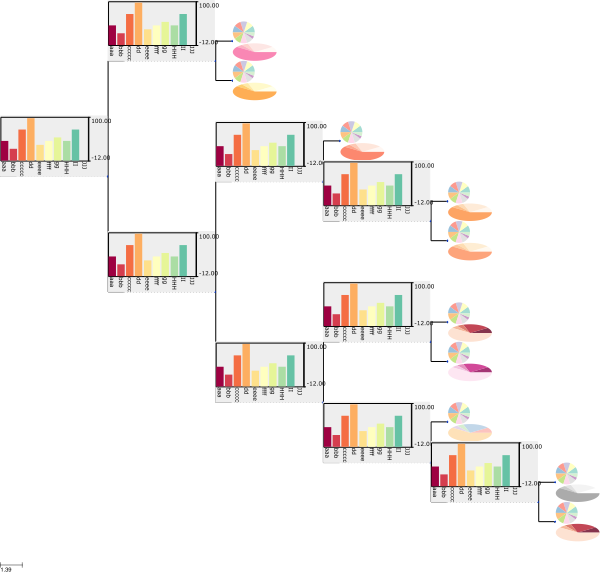




aaaaaaaaad
aaaaaaaaae


aaaaaaaaaf



aaaaaaaaag
aaaaaaaaah
aaaaaaaaai
aaaaaaaaaj
aaaaaaaaaa

aaaaaaaaab
aaaaaaaaac


In [ ]:
import sys
import random
from ete3 import Tree, faces, TreeStyle, COLOR_SCHEMES
from IPython.display import Image, display

schema_names = COLOR_SCHEMES.keys()

def layout(node):
    #print (node.name)
    if node.is_leaf():
        F= faces.PieChartFace([10,10,10,10,10,10,10,10,10,4,6],
                              colors=COLOR_SCHEMES["set3"],
                              width=50, height=50)
        F.border.width = None
        F.opacity = 0.8
        faces.add_face_to_node(F,node, 0, position="branch-right")

        F= faces.PieChartFace([10,20,5,5,60],
                              colors=COLOR_SCHEMES[random.sample(schema_names, 1)[0]],
                              width=100, height=40)
        F.border.width = None
        F.opacity = 0.8
        faces.add_face_to_node(F,node, 0, position="branch-right")
    else:
        F= faces.BarChartFace([40,20,70,100,30,40,50,40,70,-12], min_value=-12,
                              colors=COLOR_SCHEMES["spectral"],
                              labels = "aaa,bbb,cccccc,dd,eeee,ffff,gg,HHH,II,JJJ,KK".split(","),
                              label_fsize=10, scale_fsize=10)
        faces.add_face_to_node(F,node, 0, position="branch-top")
        F.background.color = "#eee"

def get_example_tree():
    t = Tree()
    ts = TreeStyle()
    ts.layout_fn = layout
    ts.mode = "r"
    ts.show_leaf_name = False
    t.populate(10)
    for leaf in t:
      leaf.add_features(num= "num: "+str(len(leaf)))
    
    return t, ts

if __name__ == '__main__':
    t, ts = get_example_tree()
    
    t.render("piechart.png", w=600, tree_style=ts)
    display(Image(filename='piechart.png'))
    t.show(tree_style=ts)
